## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [10]:
#許多的 GET 請求都會在 URL 中夾帶簡短的查詢參數（例如搜尋關鍵字等），這種狀況可以這樣寫：
# 查詢參數
#my_params = {'key1': 'value1', 'key2': 'value2'}
# 將查詢參數加入 GET 請求中
#r = requests.get('http://httpbin.org/get', params = my_params)
#參考網址:https://blog.gtwang.org/programming/python-requests-module-tutorial/

import requests
response = requests.get(target_url)
if response.status_code == requests.codes.ok:
  print("OK")

OK


In [32]:
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:1000]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg\nn00015388_304\thttp://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg\nn00015388_327\thttp://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg\nn00015388_355\thttp://img100.imageshack.us/img100/3253/forrest004fs9.jpg\nn00015388_373\thttp://img172.imageshack.us/img172/4606/napo03072en9.jpg\nn00015388_379\thttp://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg\nn00015388_388\thttp://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg\nn00015388_442\thttp://www.porschemania.it/discus/messages/815/102099.jpg\nn00015388_474\thttp://farm1.static.flickr.com/72/225029238_805b0937ca.jpg\nn00015388_514\thttp://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg\nn00015388_671\thttp://farm4.static.flickr.com/3217/2942611930_d68204f726.jpg\nn00015388_686

In [120]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data_1 = data.split(split_tag)
print(len(data_1))
data_1[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [121]:
import pandas as pd

    
df = pd.DataFrame(data_1)
df = df[0].str.split('\t',expand=True)

df.head()
print(df[0:5][1].values)

['http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'
 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'
 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'
 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'
 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
OK


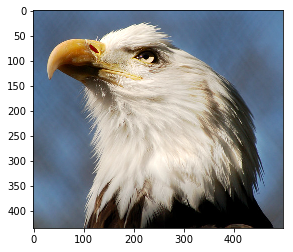

In [136]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結

first_link = df.loc[0, 1]
print(first_link)
response = requests.get(first_link)
if response.status_code == requests.codes.ok:
  print("OK")
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()


In [161]:
def img2arr_fromURLs(url_list, resize = False):
    img_list =[]
    for link in url_list:
        print(link)
        response = requests.get(link)
        try: 
            if response.status_code == requests.codes.ok:
                print("OK")
                img = Image.open(BytesIO(response.content))
                img_list.append(img)
        except:
            print("fail")
    
    return img_list

http://farm1.static.flickr.com/145/430300483_21e993670c.jpg
OK
http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg
OK
http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg
OK
http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg
OK
http://img100.imageshack.us/img100/3253/forrest004fs9.jpg
Total images that we got: 4 


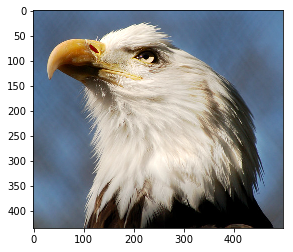

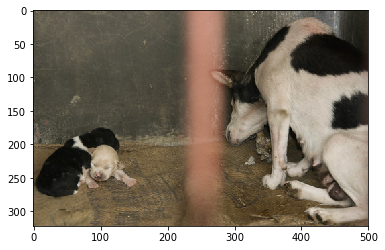

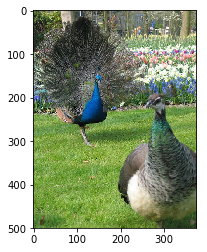

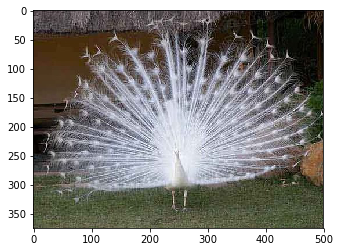

In [164]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()